THE SPARK FOUNDATION -DATA SCIENCE AND BUSIINESS ANALYTICS 

Task 1-to explore supervised machine learning

In [2]:
import pandas as pd
import numpy as np 
data = pd.read_csv("t1.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Exploratory data analysis (EDA)

In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
x = data.iloc[:, :-1].values
y= data.iloc[:, 1].values



Training and testing data

In [8]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state= 0)


In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

Text(0.5, 1.0, 'distribution of scores')

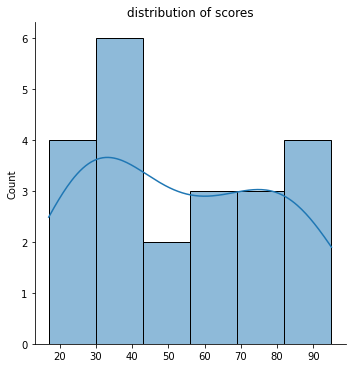

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.displot(x=y_train,kde = True)
plt.title("distribution of scores")


Text(0, 0.5, 'scores')

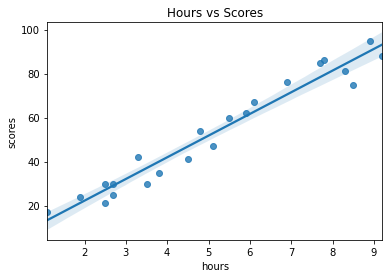

In [11]:
sns.regplot(x=x_train,y=y_train)
plt.title("Hours vs Scores")
plt.xlabel("hours")
plt.ylabel("scores")

Testing the Algorithm

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [13]:
print(regressor.intercept_)


2.5200767068662344


In [14]:
print(regressor.coef_)

[9.85475541]


Making Predictions-

In [29]:
#predicting the test set result
y_pred = regressor.predict(x_test)

#comparing acual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


VISUALIZING THE REULTS--

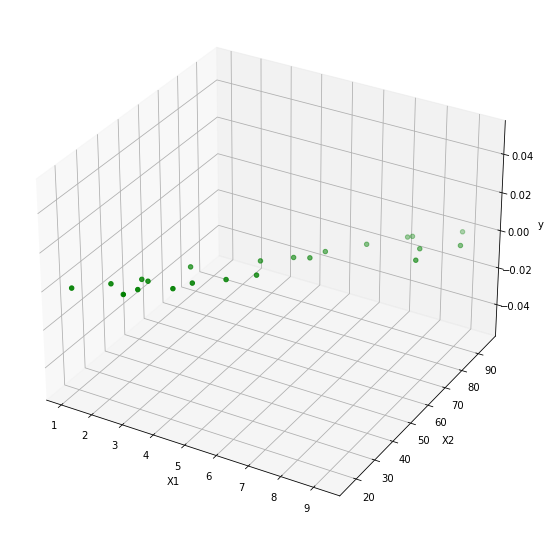

In [30]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams["figure.figsize"] = 12.8, 9.6

#visualising the training set result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train, y_train, marker='o', color='green')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

plt.show()

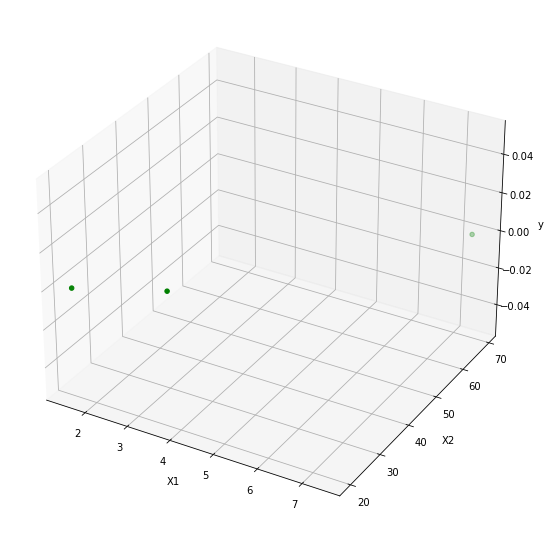

In [27]:
#visualising the test set results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test, y_test, marker='o', color='green')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

plt.show()

Evaluation-

In [22]:
k = X_test.shape[1]
n = len(X_test)
n

3

In [23]:
from sklearn.metrics import r2_score
from math import sqrt

r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('R2 =', r2, '\nAdjusted R2 =', adj_r2) 

R2 = 0.9298077534821835 
Adjusted R2 = 0.859615506964367


In [24]:
Hours = 9.25
my_pred = regressor.predict([[Hours]])

print('Hours =', Hours, '\nPrediction =', my_pred) 

Hours = 9.25 
Prediction = [93.67656425]
